# PCA of Top 20 (Market Cap) Tech Sector Stocks in S&P 500

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

## Getting stock returns

In [2]:
# Create a list of the stock tickers to be used for the PCA
# I have selected the top 20 securities from the tech sector in S&P 500 by market cap
stocks = [
    'AAPL', 'MSFT', 'GOOGL', 'META', 'AMZN', 
    'NVDA', 'TSLA', 'PYPL', 'CRM', 'ADBE',
    'NFLX', 'INTC', 'CSCO', 'ORCL', 'AVGO', 
    'IBM', 'QCOM', 'TXN', 'ZM', 'MU'
]

# Backtest period (2 years)
start_date = pd.to_datetime("2021-12-01")
end_date = pd.to_datetime("2023-11-30")

# Fetching the stock data
stock_data = yf.download(stocks, start_date, end_date)['Adj Close']

# Calculate daily returns
returns = stock_data.pct_change().dropna()

# Save data to an Excel file
with pd.ExcelWriter('stock_data.xlsx') as writer:
    stock_data.to_excel(writer, sheet_name='Adjusted Close Price')
    returns.to_excel(writer, sheet_name='Daily Returns')

[*********************100%%**********************]  20 of 20 completed


In [3]:
returns

,AAPL,ADBE,AMZN,AVGO,CRM,CSCO,GOOGL,IBM,INTC,META,MSFT,MU,NFLX,NVDA,ORCL,PYPL,QCOM,TSLA,TXN,ZM
Date,,,,,,,,,,,,,,,,,,,,
2021-12-02,-0.006130,0.022011,-0.001847,-0.004164,0.038569,0.020353,0.013573,-0.000171,0.018518,-0.000676,-0.001787,-0.026659,-0.002104,0.021982,0.002674,0.043665,0.007971,-0.009498,0.009491,-0.030145
2021-12-03,-0.011725,-0.082381,-0.013839,0.010263,-0.011026,0.001425,-0.006746,0.016595,-0.005050,-0.011437,-0.019667,-0.015203,-0.023261,-0.044606,-0.019447,-0.017205,-0.002937,-0.064199,-0.001033,-0.040834
2021-12-06,0.021503,0.008937,0.011086,0.012291,0.001665,0.012982,0.008123,0.009004,0.035330,0.035947,0.009845,0.010169,0.017538,-0.021373,0.007933,0.005056,-0.006005,-0.005872,0.006360,0.010439
2021-12-07,0.035446,0.044885,0.027987,0.044993,0.031845,0.019663,0.028742,0.013927,0.030986,0.015541,0.026763,0.040995,0.021038,0.079568,0.012480,0.033323,0.047136,0.042358,0.022712,0.017327
2021-12-08,0.022783,0.004831,-0.000037,-0.003117,-0.002547,-0.018251,0.006227,0.011844,-0.015598,0.024008,0.000149,0.002214,0.003996,-0.018534,-0.012326,0.033138,-0.005933,0.016363,-0.013264,0.030678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,0.003514,0.014288,0.019528,-0.009376,-0.002140,0.005858,0.011097,0.007927,0.000687,0.013384,0.012813,0.005084,0.006422,-0.024587,0.001378,0.016967,0.003779,-0.028980,0.003259,-0.031999
2023-11-24,-0.007004,-0.000468,0.000204,0.007068,0.002412,0.005824,-0.012997,0.000322,0.006641,-0.009546,-0.001112,-0.002983,0.003264,-0.019296,0.000086,-0.010295,0.001961,0.005294,-0.002209,0.010967
2023-11-27,-0.000948,-0.000258,0.006747,-0.029248,0.001827,-0.008892,-0.002048,0.002513,0.002730,-0.010437,0.003126,0.008326,-0.000813,0.009754,0.001892,0.011298,0.003522,0.002676,-0.006446,0.015807


## Standardizing the data

In [4]:
# Calculating mean and standard deviation for the returns data
mean_returns = returns.mean()
std_dev_returns = returns.std()

# Handle NaN values by filling with the mean of each stock's daily returns
returns = returns.fillna(mean_returns)

# Standardize the data
standardized_returns = (returns - mean_returns)/std_dev_returns

In [5]:
standardized_returns

,AAPL,ADBE,AMZN,AVGO,CRM,CSCO,GOOGL,IBM,INTC,META,MSFT,MU,NFLX,NVDA,ORCL,PYPL,QCOM,TSLA,TXN,ZM
Date,,,,,,,,,,,,,,,,,,,,
2021-12-02,-0.354219,0.855526,-0.070074,-0.253381,1.557100,1.263492,0.614199,-0.080188,0.758235,-0.041279,-0.117000,-0.998118,-0.063694,0.563463,0.095561,1.471069,0.322810,-0.243211,0.543818,-0.865268
2021-12-03,-0.654331,-3.239977,-0.516640,0.402974,-0.451803,0.089409,-0.315629,1.228601,-0.220318,-0.358147,-1.030700,-0.572051,-0.661157,-1.268547,-1.018276,-0.500027,-0.107311,-1.650712,-0.048388,-1.189111
2021-12-06,1.128051,0.342618,0.411531,0.495237,0.062249,0.806319,0.364809,0.636022,1.456228,1.037107,0.477450,0.371538,0.490990,-0.629346,0.360362,0.220851,-0.228275,-0.149920,0.367652,0.364285
2021-12-07,1.876000,1.752922,1.040866,1.982973,1.284764,1.220707,1.308315,1.020308,1.275890,0.436239,1.342041,1.517983,0.589847,2.147818,0.589335,1.136164,1.867023,1.091089,1.287780,0.572948
2021-12-08,1.196733,0.181530,-0.002673,-0.205741,-0.108342,-1.131033,0.278022,0.857715,-0.658260,0.685553,-0.018022,0.075673,0.108587,-0.551239,-0.659755,1.130185,-0.225413,0.422212,-0.736657,0.977443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22,0.163118,0.552559,0.725870,-0.490522,-0.091855,0.364388,0.500908,0.551929,0.017906,0.372713,0.629109,0.182430,0.177079,-0.717789,0.030320,0.606557,0.157508,-0.744506,0.193122,-0.921425
2023-11-24,-0.401131,-0.026358,0.006315,0.257600,0.092544,0.362267,-0.601674,-0.041684,0.265082,-0.302467,-0.082467,-0.117596,0.087896,-0.572192,-0.034750,-0.276243,0.085821,0.137402,-0.114545,0.380260
2023-11-27,-0.076234,-0.018133,0.249930,-1.394580,0.068836,-0.550504,-0.100647,0.129353,0.102705,-0.328684,0.134108,0.302991,-0.027231,0.227032,0.056209,0.422983,0.147396,0.070023,-0.352960,0.526895


## Computing the Covariance Matrix

In [6]:
covariance_matrix = standardized_returns.cov()

In [7]:
covariance_matrix

,AAPL,ADBE,AMZN,AVGO,CRM,CSCO,GOOGL,IBM,INTC,META,MSFT,MU,NFLX,NVDA,ORCL,PYPL,QCOM,TSLA,TXN,ZM
AAPL,1.000000,0.665148,0.621723,0.668655,0.622271,0.552244,0.710291,0.398011,0.569828,0.575355,0.746624,0.588759,0.481330,0.666212,0.514819,0.530327,0.686883,0.585094,0.677602,0.558826
ADBE,0.665148,1.000000,0.604896,0.650660,0.697605,0.469229,0.645268,0.296675,0.489798,0.550586,0.714387,0.554364,0.462874,0.662115,0.524260,0.535094,0.625228,0.482034,0.636641,0.551291
AMZN,0.621723,0.604896,1.000000,0.552455,0.635355,0.409818,0.682605,0.249849,0.466878,0.601404,0.685470,0.511107,0.525950,0.597897,0.414998,0.556360,0.559660,0.509577,0.545135,0.570487
AVGO,0.668655,0.650660,0.552455,1.000000,0.564086,0.579700,0.579054,0.369335,0.579750,0.491720,0.635683,0.637853,0.417596,0.714187,0.523889,0.442783,0.701736,0.501949,0.744183,0.514635
CRM,0.622271,0.697605,0.635355,0.564086,1.000000,0.428672,0.601321,0.240570,0.491373,0.541515,0.654046,0.491491,0.505907,0.610091,0.444786,0.596107,0.582379,0.475250,0.559874,0.598482
CSCO,0.552244,0.469229,0.409818,0.579700,0.428672,1.000000,0.465609,0.430916,0.423068,0.361287,0.478219,0.443599,0.284630,0.441996,0.427225,0.324492,0.481556,0.318195,0.558081,0.337385
GOOGL,0.710291,0.645268,0.682605,0.579054,0.601321,0.465609,1.000000,0.290387,0.520078,0.655225,0.734699,0.552688,0.452325,0.638802,0.444792,0.498676,0.594426,0.473375,0.613608,0.552517
IBM,0.398011,0.296675,0.249849,0.369335,0.240570,0.430916,0.290387,1.000000,0.351482,0.163689,0.305842,0.305086,0.062261,0.254830,0.356420,0.192720,0.346157,0.158054,0.411516,0.218356
INTC,0.569828,0.489798,0.466878,0.579750,0.491373,0.423068,0.520078,0.351482,1.000000,0.483338,0.535716,0.595710,0.379861,0.523526,0.374532,0.403165,0.625130,0.380271,0.643699,0.458633
META,0.575355,0.550586,0.601404,0.491720,0.541515,0.361287,0.655225,0.163689,0.483338,1.000000,0.596842,0.514422,0.507346,0.536780,0.337950,0.560156,0.518876,0.380886,0.529548,0.525226


## Performing the Principal Component Analysis

In [8]:
# Calculate eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_all = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_all]
eigenvectors = eigenvectors[:, sorted_all]

# Choose the first three eigenvectors (principal components)
principal_components = eigenvectors[:, :3]

# Store the principal components in a DataFrame
pc_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'], index=returns.columns)

In [9]:
pc_data

,PC1,PC2,PC3
AAPL,-0.258027,0.063197,-0.087399
ADBE,-0.246457,-0.017869,-0.185346
AMZN,-0.235192,-0.180423,-0.193487
AVGO,-0.246773,0.192334,0.138665
CRM,-0.236121,-0.153424,-0.190554
CSCO,-0.187920,0.339545,-0.146356
GOOGL,-0.244313,-0.058721,-0.160736
IBM,-0.125145,0.528112,-0.196708
INTC,-0.212834,0.155082,0.351352
META,-0.217251,-0.221310,-0.027638


In [10]:
# Saving the results in an excel file
with pd.ExcelWriter('pca_results.xlsx') as writer:
    covariance_matrix.to_excel(writer, sheet_name='Covariance Matrix')
    pc_data.to_excel(writer, sheet_name='PCA')

## Calculating Explained Variance

In [11]:
# Total Variance
total_variance = np.sum(eigenvalues)

# Calculating the explained variance by each PC
explained_variance = eigenvalues/total_variance

# Printing out the explained variance for each of our PCs
for i in range(3):
    var_exp = explained_variance[i]
    print(f"Variance explained by Principal Component {i+1}: \033[1m{var_exp}\033[0m")

Variance explained by Principal Component 1: 0.5445971539576001
Variance explained by Principal Component 2: 0.07108791103286687
Variance explained by Principal Component 3: 0.04277098507929037


## Plotting the data

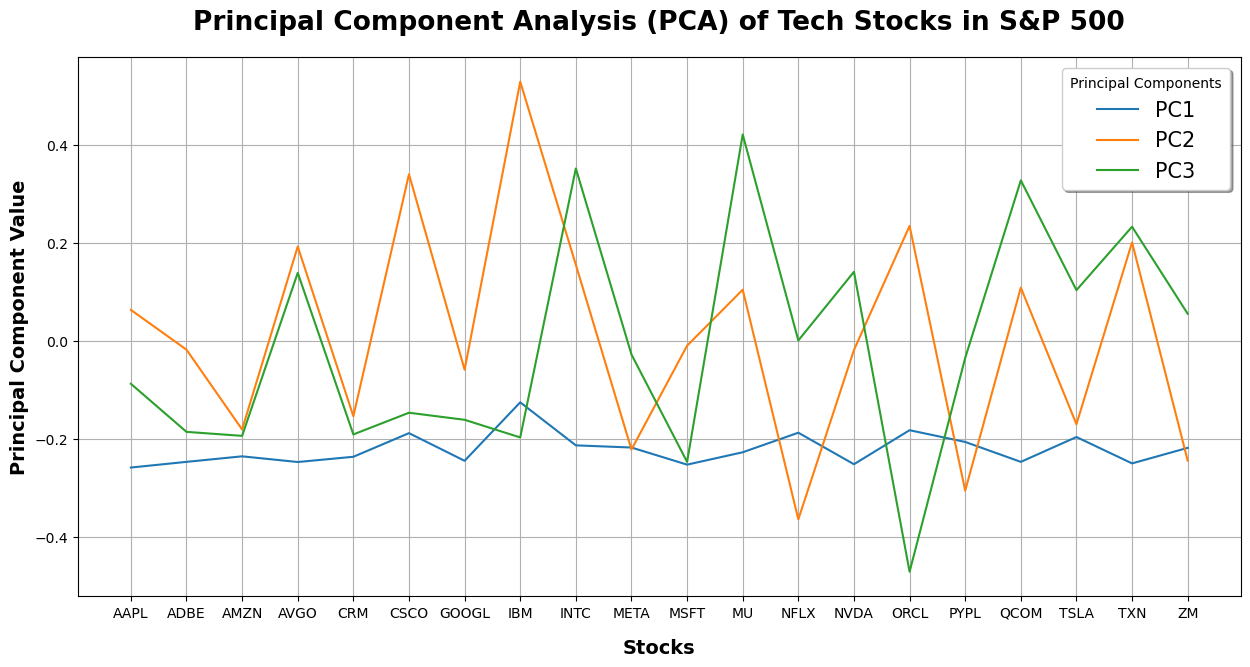

In [12]:
import matplotlib.pyplot as plt

# Plotting principal components as separate lines
plt.figure(figsize=(15, 7))

for column in pc_data.columns:
    plt.plot(pc_data.index, pc_data[column], label=column)

plt.xlabel('Stocks', fontsize=14, fontweight='bold', labelpad=13.0)
plt.ylabel('Principal Component Value', fontsize=14, fontweight='bold')
plt.title('Principal Component Analysis (PCA) of Tech Stocks in S&P 500', fontsize=19, fontweight='heavy', pad=20.0)
plt.grid(True)
plt.legend(fontsize=15, title='Principal Components', shadow=True)

plt.show()

## Comparing with the scikit-learn PCA package

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(returns)

# Creating the covariance matrix
covariance_matrix_skl = np.cov(scaled_data, rowvar=False)

# Apply PCA to get the first three principal components
pca = PCA(n_components=3)
principal_components_skl = pca.fit_transform(covariance_matrix_skl)

# Create a DataFrame to store the principal components
pc_data_skl = pd.DataFrame(data=principal_components_skl, columns=['PC1', 'PC2', 'PC3'], index=returns.columns)

In [15]:
pc_data_skl

,PC1,PC2,PC3
AAPL,-0.308033,-0.223677,0.104982
ADBE,-0.275792,-0.093589,0.205095
AMZN,-0.243246,0.190255,0.161773
AVGO,-0.158323,-0.378875,-0.061875
CRM,-0.236063,0.151954,0.156091
CSCO,0.555598,-0.240144,0.077514
GOOGL,-0.286039,-0.037510,0.182266
IBM,1.336814,-0.136147,-0.001975
INTC,0.150313,-0.174165,-0.308685
META,-0.119948,0.298449,0.011022


In [16]:
diff = pc_data_skl - pc_data

In [17]:
diff.describe()

,PC1,PC2,PC3
count,20.000000,20.000000,20.000000
mean,0.221252,-0.009188,0.008446
std,0.377854,0.509070,0.416526
min,-0.101185,-0.664259,-0.743916
25%,-0.013375,-0.344730,-0.208395
50%,0.092877,-0.128548,-0.005847
75%,0.320067,0.405113,0.343912
max,1.461958,1.028838,0.864569
